# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings

import funciones_auxiliares_machine_learning as aux

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

# Ejercicio 2

In [2]:
import pickle

modelo_propio = pickle.load(open('javier-rojas-actividad07.sav', 'rb'))
X_train = pickle.load(open('javier-rojas-X-train-actividad07.sav', 'rb'))
y_train = pickle.load(open('javier-rojas-y-train-actividad07.sav', 'rb'))
X_test = pickle.load(open('javier-rojas-X-test-actividad07.sav', 'rb'))
y_test = pickle.load(open('javier-rojas-y-test-actividad07.sav', 'rb'))

In [3]:
aux.reportar_metricas_regresion(modelo_propio, X_test, y_test)

|     |      valores |
|:----|-------------:|
| MAE | 24419.6      |
| R2  |     0.757795 |


## Reportar metricas de modelo de companero TODO

# Ejercicio 3

In [4]:
random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [5]:
aux.reportar_metricas_regresion(random_forest, X_test, y_test)

|     |      valores |
|:----|-------------:|
| MAE | 19723.4      |
| R2  |     0.859388 |


- La tabla comparativa de resultados son las siguientes:


Modelo|MAE|R2
------|---|--
Grilla|24420|0.76|
RandomForest|19723|0.85|

- Por lo tanto, se puede observar que el modelo basado en un RandomForest tuvo un drastico aumento en el desempeno (disminucion del error, y aumento del poder explicativo r2).

# Ejercicio 4

In [6]:
grilla = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(20, 1001, 50)
}

random_forest_grilla = GridSearchCV(RandomForestRegressor(oob_score=True, bootstrap=True), param_grid=grilla,
                                    verbose=5, n_jobs=-1)
random_forest_grilla.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_features': [None, 'log2', 'sqrt'],
                         'n_estimators': range(20, 1001, 50)},
             verbose=5)

In [7]:
print(f'Los mejores parametros son: {random_forest_grilla.best_params_}')
print(f'El mejor desempeno es: {random_forest_grilla.best_score_}')
print(f'El mejor desempeno OOB es: {random_forest_grilla.best_estimator_.oob_score_}')

Los mejores parametros son: {'max_features': 'log2', 'n_estimators': 370}
El mejor desempeno es: 0.8523952025208974
El mejor desempeno OOB es: 0.8522455517260356


In [8]:
oob_score = random_forest_grilla.best_estimator_.oob_score_

In [46]:
resultados_cv = pd.DataFrame(random_forest_grilla.cv_results_)
resultados_cv['params_str'] = resultados_cv['params'].astype(str) 

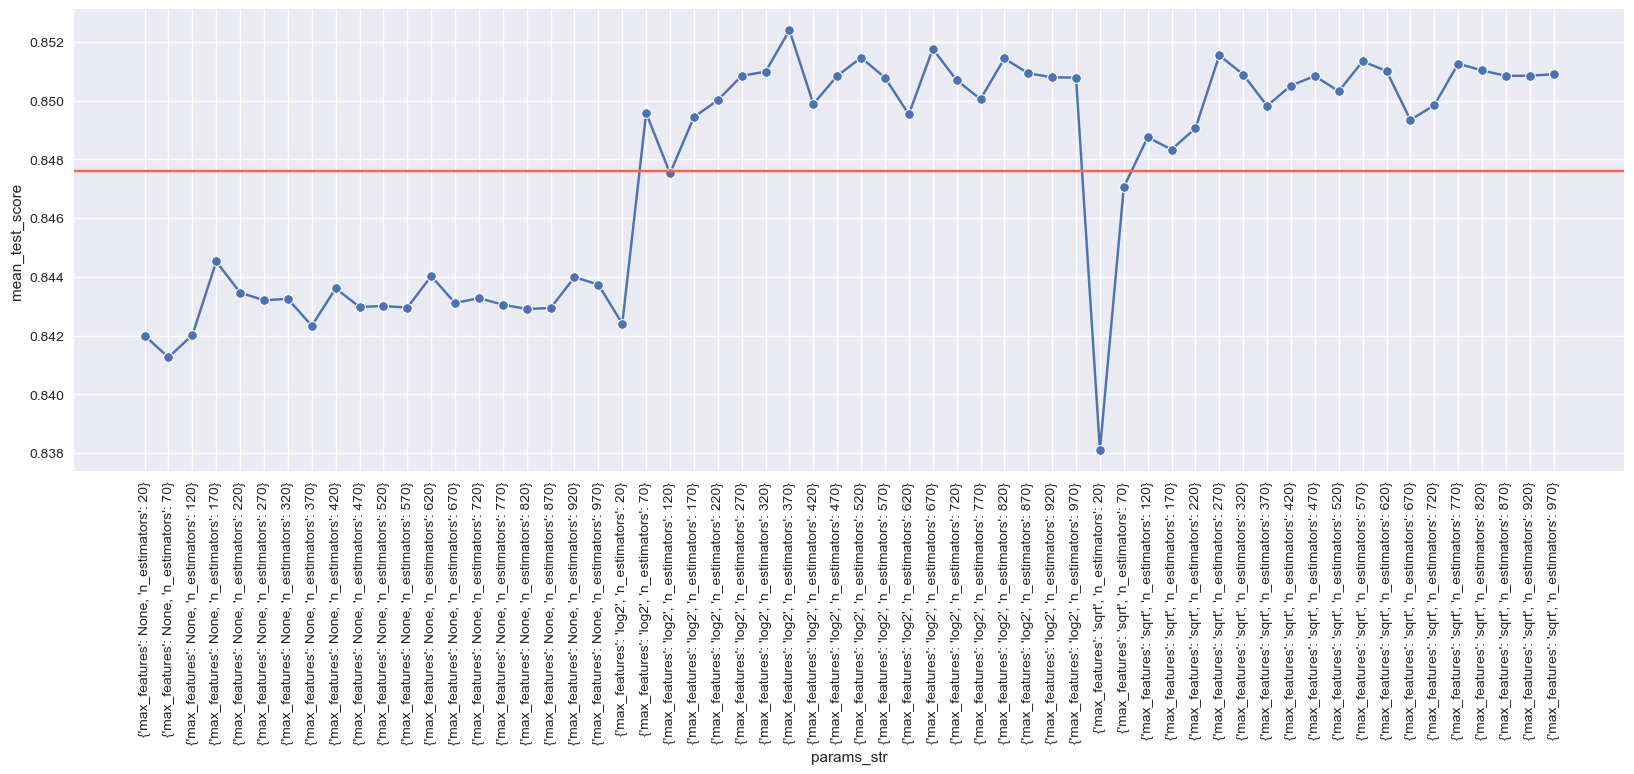

In [53]:
fig, axis = plt.subplots(figsize=(20, 6))
sns.lineplot(data=resultados_cv, x='params_str', y='mean_test_score', ax=axis, marker='o')
axis.axhline(resultados_cv['mean_test_score'].mean(), c='tomato')
axis.tick_params(axis='x', labelrotation=90)

- Desde el grafico se puede observar que el rendimiento del modelo es menor a la media cuando se utiliza max_features = None.
- El modelo presenta un desempeno similar al utilizar max_features = log2 o sqrt.
- Se puede identificar que el modelo con el mejor desempeno es con los parametros max_features = log2 y n_estimators = 370.
- El peor modelo utiliza max_features = log2 y n_estimators = 20.

## Graficar comportamiento del modelo TODO

In [45]:
resultados_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151868,0.005278,0.004595,0.000378,None,20,"{'max_features': None, 'n_estimators': 20}",0.877500,0.829387,0.833728,0.824418,0.844947,0.841996,0.019003,58
1,0.493974,0.009195,0.010438,0.001022,None,70,"{'max_features': None, 'n_estimators': 70}",0.876065,0.841250,0.825164,0.820274,0.843541,0.841259,0.019576,59
2,0.824915,0.022458,0.013947,0.001511,None,120,"{'max_features': None, 'n_estimators': 120}",0.874970,0.842607,0.827999,0.820491,0.844017,0.842017,0.018709,57
3,1.170068,0.031303,0.021051,0.001593,None,170,"{'max_features': None, 'n_estimators': 170}",0.875419,0.840686,0.836283,0.819463,0.850762,0.844523,0.018461,39
4,1.497234,0.044404,0.025774,0.002217,None,220,"{'max_features': None, 'n_estimators': 220}",0.878687,0.840476,0.830436,0.819334,0.848374,0.843462,0.020128,44
5,1.815589,0.080249,0.029763,0.002940,None,270,"{'max_features': None, 'n_estimators': 270}",0.875980,0.845130,0.830377,0.818913,0.845606,0.843201,0.019175,47
6,2.151613,0.070736,0.035261,0.003637,None,320,"{'max_features': None, 'n_estimators': 320}",0.877340,0.839844,0.832879,0.819820,0.846364,0.843249,0.019183,46
7,2.531952,0.110218,0.041941,0.002796,None,370,"{'max_features': None, 'n_estimators': 370}",0.878175,0.841294,0.833180,0.813755,0.845264,0.842334,0.020951,56
8,2.850967,0.098562,0.048394,0.004805,None,420,"{'max_features': None, 'n_estimators': 420}",0.877196,0.841515,0.831456,0.820772,0.847097,0.843607,0.019047,43
9,3.213181,0.080463,0.052306,0.007568,None,470,"{'max_features': None, 'n_estimators': 470}",0.876759,0.840844,0.833297,0.817535,0.846430,0.842973,0.019487,51


# Ejercicio 5

In [36]:
random_optimo = RandomForestRegressor(n_estimators=370, max_features='sqrt', oob_score=True, bootstrap=True,
                                      random_state=1).fit(X_train, y_train)
aux.calcular_metricas_regresion(random_optimo, X_test, y_test)

,valores
MAE,19449.119708
R2,0.857203


- La tabla resumen de todos los modelos son los siguientes:

Modelo|MAE|R2
------|---|--
Grilla|24420|0.76|
RandomForest|19723|0.859|
RandomForest Optimo|19449|0.857|

- Teniendo en cuenta estos resultados, el modelo optimo presenta el mae mas bajo y un r2 comparable al random forest sin optimizacion de hiperparametros. Por lo tanto, el modelo
optimizado presenta el mejor desempeno.